### Data Set Information:

The dataset was downloaded from https://www.kaggle.com/rajyellow46/wine-quality 

## Attribute Information:
Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

12 - quality (score between 0 and 10) - Output target variable

13 - type

In [1]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#Import the dataset

dataset=pd.read_csv("winequalityN.csv")

In [3]:
dataset.info

<bound method DataFrame.info of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total

## 1. Missing Value Ratio

In [4]:
# checking the percentage of missing values in each variable

dataset.isnull().sum()/len(dataset)*100

type                    0.000000
fixed acidity           0.153917
volatile acidity        0.123134
citric acid             0.046175
residual sugar          0.030783
chlorides               0.030783
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.138525
sulphates               0.061567
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [5]:
#check if any are more than the threshold
null_percentages = dataset.isnull().sum()/len(dataset)*100

# saving column names in a variable
features = dataset.columns
feature = [ ]

for i in range(0,len(null_percentages)):
    if null_percentages[i]<=20:   #setting the threshold value, i.e 20%
        feature.append(features[i])

In [6]:
print(len(feature))
print(feature)

13
['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [7]:
#check the percentage of rows that have null values

(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

0.04499117936088846

In [8]:
#Since the percentage of null values is negligible we can drop those

dataset = dataset.dropna(axis=0)


In [9]:
#check the percentage of rows that have null values

(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

0.0

## 2. Low Variance Filter

In [10]:
#check the variance 

dataset.var()

C:\Users\PRECIS~1\AppData\Local\Temp/ipykernel_1292/4111549166.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.var()


fixed acidity              1.684578
volatile acidity           0.027106
citric acid                0.021098
residual sugar            22.627638
chlorides                  0.001230
free sulfur dioxide      315.375528
total sulfur dioxide    3195.271901
density                    0.000009
pH                         0.025808
sulphates                  0.022175
alcohol                    1.423555
quality                    0.762629
dtype: float64

In [11]:
#density has the least variance which is very less when compared to other variables so we can safely drop this

dataset=dataset.drop(['density'],axis=1)

In [12]:
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6


## 3. High Correlation Filter

In [13]:
#checking the correlation

dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.221066,0.323744,-0.113442,0.299104,-0.283485,-0.330543,-0.251121,0.301263,-0.096190,-0.076174
volatile acidity,0.221066,1.000000,-0.377512,-0.196677,0.377995,-0.353402,-0.414729,0.260134,0.225656,-0.039528,-0.266677
citric acid,0.323744,-0.377512,1.000000,0.142324,0.039412,0.132271,0.194398,-0.327860,0.059070,-0.010056,0.084926
residual sugar,-0.113442,-0.196677,0.142324,1.000000,-0.128814,0.403449,0.495684,-0.266481,-0.185616,-0.359132,-0.034654
chlorides,0.299104,0.377995,0.039412,-0.128814,1.000000,-0.195428,-0.279602,0.044653,0.396240,-0.257664,-0.200553
free sulfur dioxide,-0.283485,-0.353402,0.132271,0.403449,-0.195428,1.000000,0.721476,-0.145164,-0.188947,-0.179477,0.054924
total sulfur dioxide,-0.330543,-0.414729,0.194398,0.495684,-0.279602,0.721476,1.000000,-0.237204,-0.275878,-0.264385,-0.041598
pH,-0.251121,0.260134,-0.327860,-0.266481,0.044653,-0.145164,-0.237204,1.000000,0.190864,0.120473,0.018403
sulphates,0.301263,0.225656,0.059070,-0.185616,0.396240,-0.188947,-0.275878,0.190864,1.000000,-0.004116,0.039054
alcohol,-0.096190,-0.039528,-0.010056,-0.359132,-0.257664,-0.179477,-0.264385,0.120473,-0.004116,1.000000,0.444637


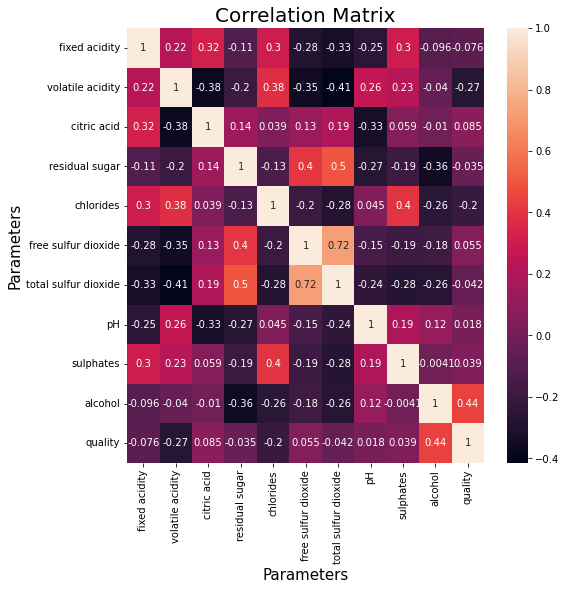

In [14]:
#Making a heatmap

plt.figure(figsize = (8, 8))
sns.heatmap(dataset.corr(), annot = True)
plt.title('Correlation Matrix', fontsize = 20)
plt.xlabel('Parameters', fontsize = 15) 
plt.ylabel('Parameters', fontsize = 15) 
plt.show()

In [15]:
#since the free sulfur dioxide and total sulfur dioxide has more correlation drop any of those. lets drop total sulfur dioxide

dataset=dataset.drop(['total sulfur dioxide'],axis=1)

In [16]:
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,3.19,0.40,9.9,6


In [17]:
#convert the type category into numerical data - ordinal encoding

dataset = dataset.replace('red', 0)
dataset = dataset.replace('white', 1)

In [18]:
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,3.19,0.40,9.9,6


In [19]:
#drop the target variable type and load this data into another dataframe

df=dataset.drop(['quality'],axis=1)

In [20]:
df.shape

(6463, 10)

## 4. Random Forest

In [21]:
#import the package for random forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(df,dataset.quality)

RandomForestRegressor(max_depth=10, random_state=1)

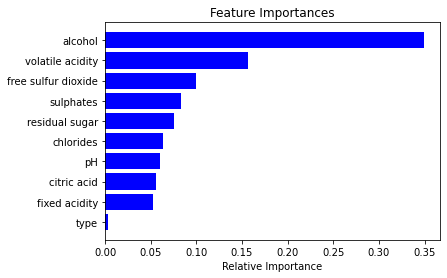

In [22]:
#Build the graph to check feature importance

features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [23]:
#quality is of least importance so drop that

df=df.drop(['type'],axis=1)

## 5. Backward Feature Extraction

In [24]:
#import the feature selection libraries and linear regression libraries 

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lreg = LinearRegression()
rfe = RFE(lreg,n_features_to_select=7)
rfe = rfe.fit(df, dataset.quality)

In [25]:
#check the retained column names

x_rfe = df[df.columns[rfe.support_]]
print(x_rfe.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


## 6. Forward Feature Selection

In [26]:
#import the required libraries for forward selection

from sklearn.feature_selection import f_regression
ffs = f_regression(x_rfe,dataset.quality )

In [27]:
#Take the top most variables after the forward selection process

final_features = [ ]
for i in range(0,len(x_rfe.columns)-1):
    if ffs[0][i] >=10:
        final_features.append(df.columns[i])

In [28]:
final_features

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']